## EDA/Data Cleaning & Prep

In [4]:
# Installing the package that has webscraped baseball stats
pip install pybaseball

In [180]:
import pybaseball
import pandas as pd
import seaborn as sns
from pybaseball import team_batting, team_pitching, team_fielding, standings, schedule_and_record

In [35]:
batting_data = team_batting(1970, 2022)

In [286]:
batting_cols = batting_data[['teamIDfg','Team', 'Season', 'AVG', 'OBP', 'SLG', 'AB', 'H', 'HR', 'SB', 'R', 'RBI', 'SO', 'BB', 'WAR' ]]
batting_cols_new = batting_cols.rename(columns = {'H': 'batter_hits', 'HR': 'batter_hr', 'SB': 'runner_sb', 'R': 'batter_runs', 'SO' : 'batter_SO', 'BB': 'batter_BB', 'WAR': 'batter_war'})
batting_sorted = batting_cols_new.sort_values(by = ['Season', 'teamIDfg'])
batting_sorted_index = batting_sorted.set_index('teamIDfg')

In [235]:
pitching_data = team_pitching(1970, 2022)

In [285]:
pitching_cols = pitching_data[['teamIDfg','Team','Season','ERA', 'W', 'L', 'SV', 'K/9', 'BB', 'H', 'HR', 'R', 'ER', 'WHIP', 'AVG', 'BABIP', 'WAR']]
pitching_cols_new = pitching_cols.rename(columns = {'Team': 'team', 'Season': 'season', 'BB': 'pitcher_walks', 'H': 'pitcher_hits', 'HR': 'pitcher_hrs', 'R': 'pitcher_runs', 'AVG' : 'oppenent_avg', 'WAR': 'pitcher_war'})
pitching_cols_new['Win_Percentage'] = pitching_cols_new['W']/(pitching_cols_new['L'] + pitching_cols_new['W'])
pitching_sorted = pitching_cols_new.sort_values(by = ['season', 'teamIDfg'])
pitching_sorted_index = pitching_sorted.set_index('teamIDfg')

In [39]:
fielding_data = team_fielding(1970, 2022)

In [287]:
fielding_cols = fielding_data[['teamIDfg','Team','Season','PO', 'A', 'E', 'DP', 'SB', 'CS', 'PB', 'WP', 'FP']]
fielding_cols_new = fielding_cols.rename(columns = {'Team': 'team_name', 'Season': 'seasons','SB': 'allowed_SB'})
fielding_sorted = fielding_cols_new.sort_values(by = ['seasons', 'teamIDfg'])
fielding_sorted_index = fielding_sorted.set_index('teamIDfg')

In [288]:
pitch_bat_df = pd.concat([batting_sorted_index, pitching_sorted_index], 1)
stats_df = pd.concat([pitch_bat_df, fielding_sorted_index], 1)
stats_df.drop(columns = ['team', 'season', 'team_name', 'seasons'], inplace = True)
stats_df['run_diff'] = stats_df['batter_runs'] - stats_df['pitcher_runs']

Index(['Team', 'Season', 'AVG', 'OBP', 'SLG', 'AB', 'batter_hits', 'batter_hr',
       'runner_sb', 'batter_runs', 'RBI', 'batter_SO', 'batter_BB',
       'batter_war', 'ERA', 'W', 'L', 'SV', 'K/9', 'pitcher_walks',
       'pitcher_hits', 'pitcher_hrs', 'pitcher_runs', 'ER', 'WHIP',
       'oppenent_avg', 'BABIP', 'pitcher_war', 'Win_Percentage', 'PO', 'A',
       'E', 'DP', 'allowed_SB', 'CS', 'PB', 'WP', 'FP', 'run_diff'],
      dtype='object')

In [312]:
refined_df = stats_df[stats_df['AB'] > 4000]

In [324]:
df = refined_df[['Team', 'Season','AVG','OBP','SLG', 'RBI', 'batter_SO', 'batter_BB', 'batter_war', 'ERA', 'SV', 'K/9', 'WHIP', 'oppenent_avg', 'BABIP', 'pitcher_war', 'FP', 'run_diff', 'Win_Percentage']]

In [325]:
df.to_csv('stats.csv')

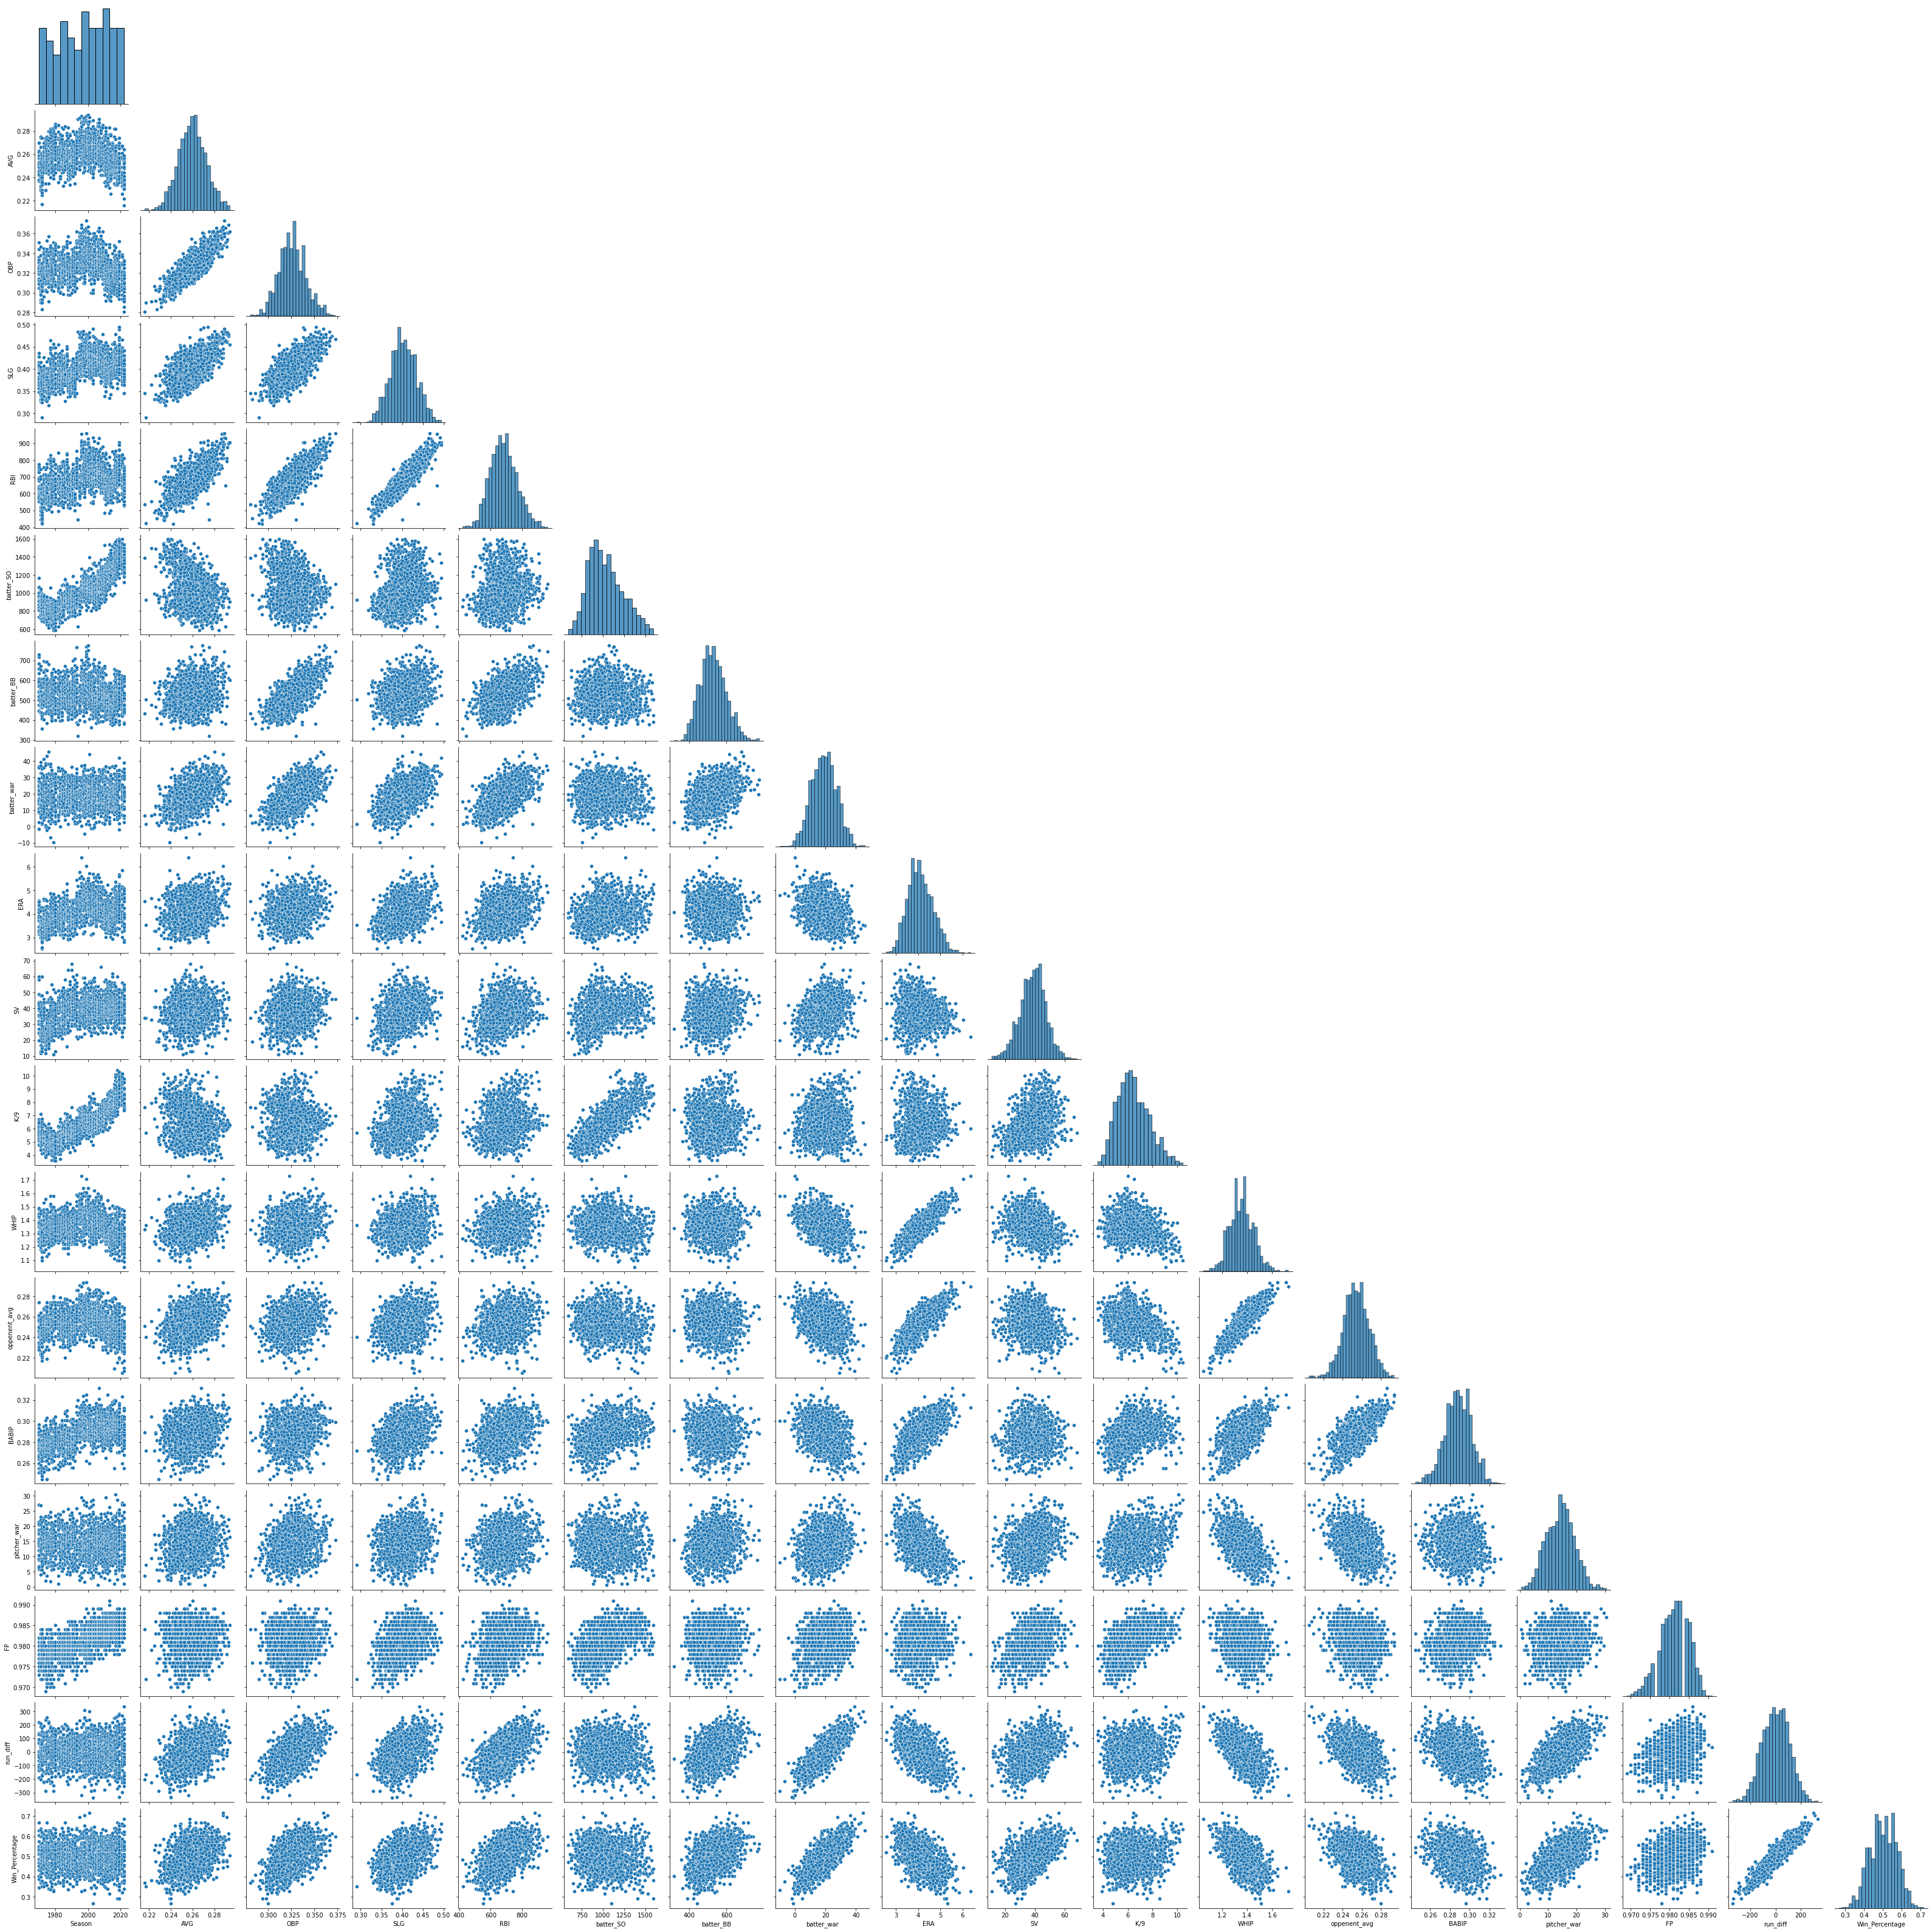

In [316]:
sns.pairplot(df, corner = True);

(17.5, -0.5)

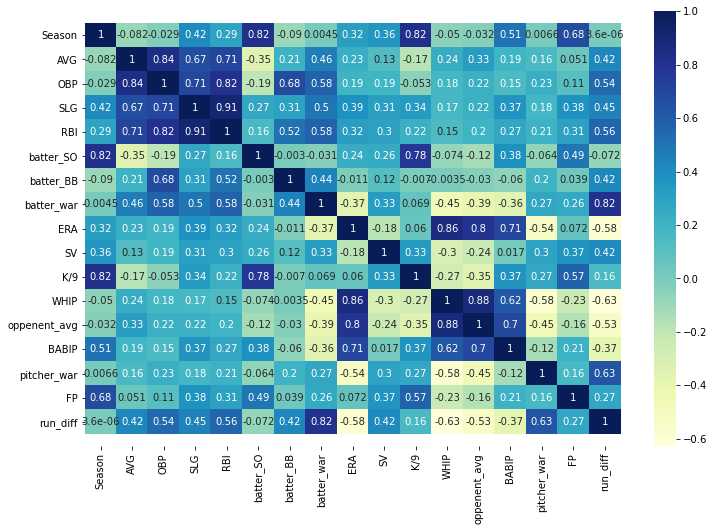

In [320]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap((df.drop(columns = 'Win_Percentage')).corr(), ax=ax, cmap='YlGnBu', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [321]:
standings(1985)

[                  Tm   W    L  W-L%    GB
 1  Toronto Blue Jays  99   62  .615    --
 2   New York Yankees  97   64  .602   2.0
 3     Detroit Tigers  84   77  .522  15.0
 4  Baltimore Orioles  83   78  .516  16.0
 5     Boston Red Sox  81   81  .500  18.5
 6  Milwaukee Brewers  71   90  .441  28.0
 7  Cleveland Indians  60  102  .370  39.5,
                    Tm   W   L  W-L%    GB
 1  Kansas City Royals  91  71  .562    --
 2   California Angels  90  72  .556   1.0
 3   Chicago White Sox  85  77  .525   6.0
 4     Minnesota Twins  77  85  .475  14.0
 5   Oakland Athletics  77  85  .475  14.0
 6    Seattle Mariners  74  88  .457  17.0
 7       Texas Rangers  62  99  .385  28.5,
                       Tm    W    L  W-L%    GB
 1    St. Louis Cardinals  101   61  .623    --
 2          New York Mets   98   64  .605   3.0
 3         Montreal Expos   84   77  .522  16.5
 4           Chicago Cubs   77   84  .478  23.5
 5  Philadelphia Phillies   75   87  .463  26.0
 6     Pittsburgh Pira

In [323]:
schedule_and_record(1985, "NYY")

http://www.baseball-reference.com/teams/NYY/1985-schedule-scores.shtml


Date   Tm Home_Away  Opp W/L    R    RA  Inn    W-L  Rank  \
1        Monday, Apr 8  NYY         @  BOS   L  2.0   9.0  9.0    0-1   5.0   
2    Wednesday, Apr 10  NYY         @  BOS   L  5.0  14.0  9.0    0-2   6.0   
3     Thursday, Apr 11  NYY         @  BOS   L  4.0   6.0  9.0    0-3   6.0   
4     Saturday, Apr 13  NYY         @  CLE   W  6.0   3.0  9.0    1-3   6.0   
5       Sunday, Apr 14  NYY         @  CLE   W  2.0   1.0  9.0    2-3   6.0   
..                 ...  ...       ...  ...  ..  ...   ...  ...    ...   ...   
157   Wednesday, Oct 2  NYY      Home  MIL   L  0.0   1.0  9.0  94-63   2.0   
158    Thursday, Oct 3  NYY      Home  MIL   W  3.0   0.0  9.0  95-63   2.0   
159      Friday, Oct 4  NYY         @  TOR   W  4.0   3.0  9.0  96-63   2.0   
160    Saturday, Oct 5  NYY         @  TOR   L  1.0   5.0  9.0  96-64   2.0   
161      Sunday, Oct 6  NYY         @  TOR   W  8.0   0.0  9.0  97-64   2.0   

      GB        Win       Loss      Save  Time D/N  Attendance   cLI  Streak  \
1    1.0       Boyd     Niekro      None  2:33   D     34282.0  1.43      -1   
2    2.0      Hurst    Whitson      None  2:56   D     19615.0  1.35      -2   
3    3.0    Clemens  Rasmussen   Stanley  3:00   D     19060.0  1.22      -3   
4    3.0     Guidry   Blyleven  Righetti  2:59   D     61978.0   .99       1   
5    3.0     Niekro    Waddell  Righetti  2:44   D     12085.0  1.08       2   
..   ...        ...        ...       ...   ...  ..         ...   ...     ...   
157  4.0    Higuera    Shirley      None  2:10   N     11879.0  1.14      -1   
158  3.0     Guidry      Leary    Fisher  2:32   N     15226.0  1.11       1   
159  2.0     Scurry      Henke  Righetti  2:55   N     47686.0  4.38       2   
160  3.0  Alexander     Cowley      None  2:38   D     44608.0  9.62      -1   
161  2.0     Niekro    Cerutti      None  2:25   D     44422.0   .00       1   

    Orig. Scheduled  
1              None  
2              None  
3              None  
4              None  
5              None  
..              ...  
157            None  
158            None  
159            None  
160            None  
161            None  

[161 rows x 20 columns]

In [173]:
#for i,row in stats_df.iterrows():
    #for year in row['season']:
        #for team in row['Team'].unique():
            #stats_df.loc[stats_df['year'] == year & stats_df['team'] == team]['opponent_{}'.format(team)] = [x for x in standings(year)[0]['Tm']]
            
    

1
Team                   CAL
Season                1970
AVG                  0.251
OBP                  0.309
SLG                  0.363
OPS                  0.672
AB                    5532
batter_hits           1391
batter_hr              114
runner_sb               69
batter_runs            631
RBI                    598
batter_SO              922
batter_BB              447
W                       86
L                       76
ERA                   3.48
SV                      49
pitcher_SO             922
pitcher_walks          559
pitcher_hits          1280
pitcher_hrs            154
pitcher_runs           630
ER                     566
Win_Percentage    0.530864
PO                    4377
A                     1782
E                      127
DP                     461
allowed_SB              78
CS                      42
PB                      27
WP                      51
FP                    0.98
Name: 1, dtype: object
2
Team                   BAL
Season                1970
A

Team                  ATL
Season               1974
AVG                 0.249
OBP                 0.319
SLG                 0.363
OPS                 0.683
AB                   5533
batter_hits          1375
batter_hr             120
runner_sb              72
batter_runs           661
RBI                   599
batter_SO             772
batter_BB             571
W                      88
L                      74
ERA                  3.06
SV                     22
pitcher_SO            772
pitcher_walks         488
pitcher_hits         1343
pitcher_hrs            97
pitcher_runs          563
ER                    501
Win_Percentage    0.54321
PO                   4430
A                    1825
E                     132
DP                    426
allowed_SB            107
CS                     50
PB                     31
WP                     33
FP                  0.979
Name: 16, dtype: object
17
Team                   CHC
Season                1974
AVG                  0.251
OBP     

Name: 4, dtype: object
5
Team                   CLE
Season                1979
AVG                  0.258
OBP                   0.34
SLG                  0.384
OPS                  0.724
AB                    5376
batter_hits           1388
batter_hr              138
runner_sb              143
batter_runs            760
RBI                    707
batter_SO              786
batter_BB              657
W                       81
L                       80
ERA                   4.58
SV                      32
pitcher_SO             781
pitcher_walks          570
pitcher_hits          1502
pitcher_hrs            138
pitcher_runs           805
ER                     729
Win_Percentage    0.503106
PO                    4297
A                     1641
E                      132
DP                     393
allowed_SB             146
CS                      47
PB                      16
WP                      44
FP                   0.978
Name: 5, dtype: object
6
Team                DET
Season  

Name: 10, dtype: object
11
Team                  SEA
Season               1983
AVG                  0.24
OBP                 0.301
SLG                  0.36
OPS                 0.661
AB                   5336
batter_hits          1280
batter_hr             111
runner_sb             144
batter_runs           558
RBI                   536
batter_SO             840
batter_BB             460
W                      60
L                     102
ERA                  4.19
SV                     39
pitcher_SO            910
pitcher_walks         544
pitcher_hits         1455
pitcher_hrs           145
pitcher_runs          740
ER                    661
Win_Percentage    0.37037
PO                   4252
A                    1857
E                     136
DP                    429
allowed_SB            132
CS                     55
PB                     16
WP                     48
FP                  0.978
Name: 11, dtype: object
13
Team                   TEX
Season                1983
AVG     

2
Team                  BAL
Season               1987
AVG                 0.258
OBP                 0.322
SLG                 0.418
OPS                  0.74
AB                   5576
batter_hits          1437
batter_hr             211
runner_sb              69
batter_runs           729
RBI                   701
batter_SO             939
batter_BB             524
W                      67
L                      95
ERA                  5.01
SV                     30
pitcher_SO            870
pitcher_walks         547
pitcher_hits         1555
pitcher_hrs           226
pitcher_runs          880
ER                    802
Win_Percentage    0.41358
PO                   4319
A                    1748
E                     111
DP                    465
allowed_SB            145
CS                     57
PB                      5
WP                     52
FP                  0.982
Name: 2, dtype: object
3
Team                   BOS
Season                1987
AVG                  0.278
OBP     

Name: 17, dtype: object
18
Team                   CIN
Season                1990
AVG                  0.265
OBP                  0.325
SLG                  0.399
OPS                  0.724
AB                    5525
batter_hits           1466
batter_hr              125
runner_sb              166
batter_runs            693
RBI                    644
batter_SO              913
batter_BB              466
W                       91
L                       71
ERA                    3.4
SV                      50
pitcher_SO            1029
pitcher_walks          543
pitcher_hits          1338
pitcher_hrs            124
pitcher_runs           597
ER                     550
Win_Percentage    0.561728
PO                    4371
A                     1691
E                      102
DP                     328
allowed_SB             135
CS                      60
PB                      19
WP                      48
FP                   0.983
Name: 18, dtype: object
21
Team                   HOU
S

6
Team                  DET
Season               1994
AVG                 0.265
OBP                 0.352
SLG                 0.454
OPS                 0.806
AB                   3955
batter_hits          1048
batter_hr             161
runner_sb              46
batter_runs           652
RBI                   622
batter_SO             897
batter_BB             520
W                      53
L                      62
ERA                  5.39
SV                     20
pitcher_SO            560
pitcher_walks         449
pitcher_hits         1139
pitcher_hrs           148
pitcher_runs          671
ER                    609
Win_Percentage    0.46087
PO                   3055
A                    1261
E                      82
DP                    250
allowed_SB             94
CS                     36
PB                      8
WP                     59
FP                  0.981
Name: 6, dtype: object
7
Team                   KCR
Season                1994
AVG                  0.269
OBP     

Team                   MIL
Season                1997
AVG                   0.26
OBP                  0.325
SLG                  0.398
OPS                  0.723
AB                    5444
batter_hits           1415
batter_hr              135
runner_sb              103
batter_runs            681
RBI                    643
batter_SO              967
batter_BB              494
W                       78
L                       83
ERA                   4.23
SV                      44
pitcher_SO            1016
pitcher_walks          542
pitcher_hits          1419
pitcher_hrs            177
pitcher_runs           742
ER                     671
Win_Percentage    0.484472
PO                    4281
A                     1655
E                      121
DP                     464
allowed_SB             106
CS                      52
PB                      11
WP                      46
FP                    0.98
Name: 23, dtype: object
24
Team                   MON
Season                1997
A

Name: 7, dtype: object
8
Team                   MIN
Season                2001
AVG                  0.272
OBP                  0.337
SLG                  0.433
OPS                   0.77
AB                    5560
batter_hits           1514
batter_hr              164
runner_sb              146
batter_runs            771
RBI                    717
batter_SO             1083
batter_BB              495
W                       85
L                       77
ERA                   4.51
SV                      45
pitcher_SO             965
pitcher_walks          445
pitcher_hits          1494
pitcher_hrs            192
pitcher_runs           766
ER                     723
Win_Percentage    0.524691
PO                    4324
A                     1542
E                      108
DP                     313
allowed_SB              73
CS                      43
PB                       4
WP                      58
FP                   0.982
Name: 8, dtype: object
9
Team                  NYY
Season

21
Team                   HOU
Season                2004
AVG                  0.267
OBP                  0.342
SLG                  0.436
OPS                  0.778
AB                    5468
batter_hits           1458
batter_hr              187
runner_sb               89
batter_runs            803
RBI                    756
batter_SO              999
batter_BB              590
W                       92
L                       70
ERA                   4.05
SV                      47
pitcher_SO            1282
pitcher_walks          525
pitcher_hits          1416
pitcher_hrs            174
pitcher_runs           698
ER                     650
Win_Percentage    0.567901
PO                    4329
A                     1614
E                      101
DP                     343
allowed_SB             101
CS                      39
PB                       4
WP                      45
FP                   0.983
Name: 21, dtype: object
22
Team                   LAD
Season                200

Name: 27, dtype: object
28
Team                   STL
Season                2007
AVG                  0.274
OBP                  0.337
SLG                  0.405
OPS                  0.743
AB                    5529
batter_hits           1513
batter_hr              141
runner_sb               56
batter_runs            725
RBI                    690
batter_SO              909
batter_BB              506
W                       78
L                       84
ERA                   4.67
SV                      34
pitcher_SO             945
pitcher_walks          509
pitcher_hits          1514
pitcher_hrs            168
pitcher_runs           829
ER                     745
Win_Percentage    0.481481
PO                    4307
A                     1672
E                      121
DP                     363
allowed_SB              58
CS                      34
PB                      10
WP                      39
FP                    0.98
Name: 28, dtype: object
29
Team                   SDP
S

Name: 19, dtype: object
20
Team                   FLA
Season                2011
AVG                  0.247
OBP                  0.318
SLG                  0.388
OPS                  0.706
AB                    5508
batter_hits           1358
batter_hr              149
runner_sb               95
batter_runs            625
RBI                    596
batter_SO             1244
batter_BB              542
W                       72
L                       90
ERA                   3.95
SV                      40
pitcher_SO            1218
pitcher_walks          500
pitcher_hits          1403
pitcher_hrs            149
pitcher_runs           702
ER                     641
Win_Percentage    0.444444
PO                    4379
A                     1553
E                       93
DP                     287
allowed_SB             103
CS                      24
PB                      10
WP                      43
FP                   0.985
Name: 20, dtype: object
21
Team                   HOU
S

Name: 9, dtype: object
10
Team                   OAK
Season                2015
AVG                  0.251
OBP                  0.312
SLG                  0.395
OPS                  0.707
AB                    5600
batter_hits           1405
batter_hr              146
runner_sb               78
batter_runs            694
RBI                    661
batter_SO             1119
batter_BB              475
W                       68
L                       94
ERA                   4.16
SV                      28
pitcher_SO            1179
pitcher_walks          474
pitcher_hits          1402
pitcher_hrs            172
pitcher_runs           729
ER                     668
Win_Percentage    0.419753
PO                    4334
A                     1642
E                      126
DP                     368
allowed_SB              78
CS                      40
PB                      14
WP                      62
FP                   0.979
Name: 10, dtype: object
11
Team                   SEA
Se

Name: 27, dtype: object
28
Team                  STL
Season               2018
AVG                 0.249
OBP                 0.321
SLG                 0.409
OPS                  0.73
AB                   5498
batter_hits          1369
batter_hr             205
runner_sb              63
batter_runs           759
RBI                   725
batter_SO            1380
batter_BB             525
W                      88
L                      74
ERA                  3.85
SV                     43
pitcher_SO           1337
pitcher_walks         593
pitcher_hits         1354
pitcher_hrs           144
pitcher_runs          691
ER                    623
Win_Percentage    0.54321
PO                   4366
A                    1540
E                     133
DP                    374
allowed_SB             47
CS                     13
PB                      7
WP                     63
FP                  0.978
Name: 28, dtype: object
29
Team                   SDP
Season                2018
AVG     

24
Team                   WSN
Season                2021
AVG                  0.258
OBP                  0.337
SLG                  0.417
OPS                  0.754
AB                    5385
batter_hits           1388
batter_hr              182
runner_sb               56
batter_runs            724
RBI                    686
batter_SO             1303
batter_BB              573
W                       65
L                       97
ERA                   4.82
SV                      36
pitcher_SO            1346
pitcher_walks          548
pitcher_hits          1364
pitcher_hrs            247
pitcher_runs           820
ER                     747
Win_Percentage    0.401235
PO                    4183
A                     1361
E                       96
DP                     263
allowed_SB              90
CS                      32
PB                       5
WP                      43
FP                   0.983
Name: 24, dtype: object
25
Team                   NYM
Season                202